# Phase-2 : Data Cleaning & Manipulation

In [1]:
import pandas as pd      
import numpy as np     
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### Load dataset

In [3]:
df=pd.read_csv(r"D:/Dataset/healthcare.csv")

In [4]:
df.shape

(55500, 15)

In [5]:
df['Age Group'] = pd.cut(df['Age'], bins=[0,18,35,50,65,90], labels=['Children & Teens','Young Adults','Middle Age','Older Adults','Seniors'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True, errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date of Admission'].dt.year
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [6]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Year,Length of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281310,328,Urgent,2024-02-02,Paracetamol,Normal,Young Adults,2024,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327290,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Older Adults,2019,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096080,205,Emergency,2022-10-07,Aspirin,Normal,Seniors,2022,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Young Adults,2020,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317810,458,Urgent,2022-10-09,Penicillin,Abnormal,Middle Age,2022,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Middle Age,2020,30
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797310,316,Elective,2020-02-01,Aspirin,Normal,Older Adults,2020,9
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764720,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Middle Age,2020,28
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092360,321,Elective,2019-05-31,Ibuprofen,Abnormal,Middle Age,2019,6


In [7]:
df['Age Group']=df['Age Group'].astype('object')
df['Year']=df['Year'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

### 1.Handle Missing Data 

In [9]:
# Identify missing values: 
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Age Group             0
Year                  0
Length of Stay        0
dtype: int64

##### Observation:
- I checked for missing values in the dataset and found none. This means the data is clean and I can directly move to EDA without handling null values.

### 2. Remove Duplicates 

In [10]:
# let's check number of duplicate records 
duplicates=df.duplicated().sum()
duplicates
# remove duplicate rows 
df_cleaned=df.drop_duplicates()

# verify removal 
print(f"Dataset shape before removing duplicates:{df.shape}")
print(f"Dataset shape after removing duplicates:{df_cleaned.shape}")
print(f"Remaining duplicate records:{df_cleaned.duplicated().sum()}")

534

Dataset shape before removing duplicates:(55500, 18)
Dataset shape after removing duplicates:(54966, 18)
Remaining duplicate records:0


##### Observation:
- The dataset initially contained 534 duplicate records.
- After applying duplicate removal, the dataset has 0 duplicate entries.
- Ensures each record is unique

### 3. Fix Inconsistencies in Categorical Data

In [11]:
# check for categorical data
categorical_col=df.select_dtypes(include='object').columns    
categorical_col

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Admission Type', 'Medication',
       'Test Results', 'Age Group'],
      dtype='object')

In [12]:
# converting object type into categorical data       
for col in categorical_col: 
    df[col]=df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  category      
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  category      
 3   Blood Type          55500 non-null  category      
 4   Medical Condition   55500 non-null  category      
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  category      
 7   Hospital            55500 non-null  category      
 8   Insurance Provider  55500 non-null  category      
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  category      
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  category  

##### Observation:
All categorical text columns were converted from object type to category type. It increases memory ,even though memory increased after converting to category, there are functional benefits: faster comparisons, efficient grouping, and consistency in categorical values.

#### cleaning the categorical columns

In [14]:
for col in df.select_dtypes(include='object').columns: 
    df[col]=df[col].str.strip().str.lower()

In [15]:
df['Gender']=df['Gender'].str.strip().str.lower()
df['Blood Type']=df['Blood Type'].str.strip().str.lower()
df['Admission Type']=df['Admission Type'].str.strip().str.lower()
df['Doctor']=df['Doctor'].str.strip().str.lower()
df['Hospital']=df['Hospital'].str.strip().str.lower()
df['Insurance Provider']=df['Insurance Provider'].str.strip().str.lower()
df['Medical Condition']=df['Medical Condition'].str.strip().str.lower()
df['Medication']=df['Medication'].str.strip().str.lower()
df['Test Results']=df['Test Results'].str.strip().str.lower()
df['Name']=df['Name'].str.strip().str.lower()
df['Age Group']=df['Age Group'].str.strip().str.lower()

In [16]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group,Year,Length of Stay
0,bobby jackson,30,male,b-,cancer,2024-01-31,matthew smith,sons and miller,blue cross,18856.28131,328,urgent,2024-02-02,paracetamol,normal,young adults,2024,2
1,leslie terry,62,male,a+,obesity,2019-08-20,samantha davies,kim inc,medicare,33643.32729,265,emergency,2019-08-26,ibuprofen,inconclusive,older adults,2019,6
2,danny smith,76,female,a-,obesity,2022-09-22,tiffany mitchell,cook plc,aetna,27955.09608,205,emergency,2022-10-07,aspirin,normal,seniors,2022,15
3,andrew watts,28,female,o+,diabetes,2020-11-18,kevin wells,"hernandez rogers and vang,",medicare,37909.78241,450,elective,2020-12-18,ibuprofen,abnormal,young adults,2020,30
4,adrienne bell,43,female,ab+,cancer,2022-09-19,kathleen hanna,white-white,aetna,14238.31781,458,urgent,2022-10-09,penicillin,abnormal,middle age,2022,20


##### Observation:
The dataset has 11 columns with text data:Name, Gender, Bloodtype, Medical condition, Doctor, Hospital, Insurance provider, Admission type, Medication, Age group and Test results.

### 4. Convert Data Types

In [17]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'],errors="coerce")
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'],errors="coerce")
numeric_cols=['Age', 'Billing Amount', 
              'Room Number', 'Year', 'Length of Stay'] 

for col in numeric_cols:  
    df[col]= pd.to_numeric(df[col],errors="coerce")
    
categorical_cols=['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Admission Type', 'Medication',
       'Test Results', 'Age Group']

for col in categorical_cols: 
    df[col]=df[col].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  category      
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  category      
 3   Blood Type          55500 non-null  category      
 4   Medical Condition   55500 non-null  category      
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  category      
 7   Hospital            55500 non-null  category      
 8   Insurance Provider  55500 non-null  category      
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  category      
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  category  

##### Observation:
All columns were checked and converted to the right data types. There are date fields in this dataset like Date of Admission and Discharge Date. Numeric values like Age, Billing Amount ,Room Number, Year and Length of Stay are stored as numbers. The text columns are Name, Gender, Blood type,Medical condition, Doctor, Hospital, Insurance provider, Admission type, Medication, Age group and Test results were marked as categorial since they contain repeated labels or identifiers.

##### importing the modules

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

### 5. Non-Visual Analysis

##### column names

In [20]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age Group', 'Year', 'Length of Stay'],
      dtype='object')

In [21]:
numerical_cols=df.select_dtypes(include=[int,float]).columns

In [22]:
numerical_cols

Index(['Age', 'Billing Amount', 'Room Number', 'Year', 'Length of Stay'], dtype='object')

In [23]:
categorical_col=df.select_dtypes(include='category').columns

In [24]:
categorical_col

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Admission Type', 'Medication',
       'Test Results', 'Age Group'],
      dtype='object')

### Univariate Analysis

#### One numerical

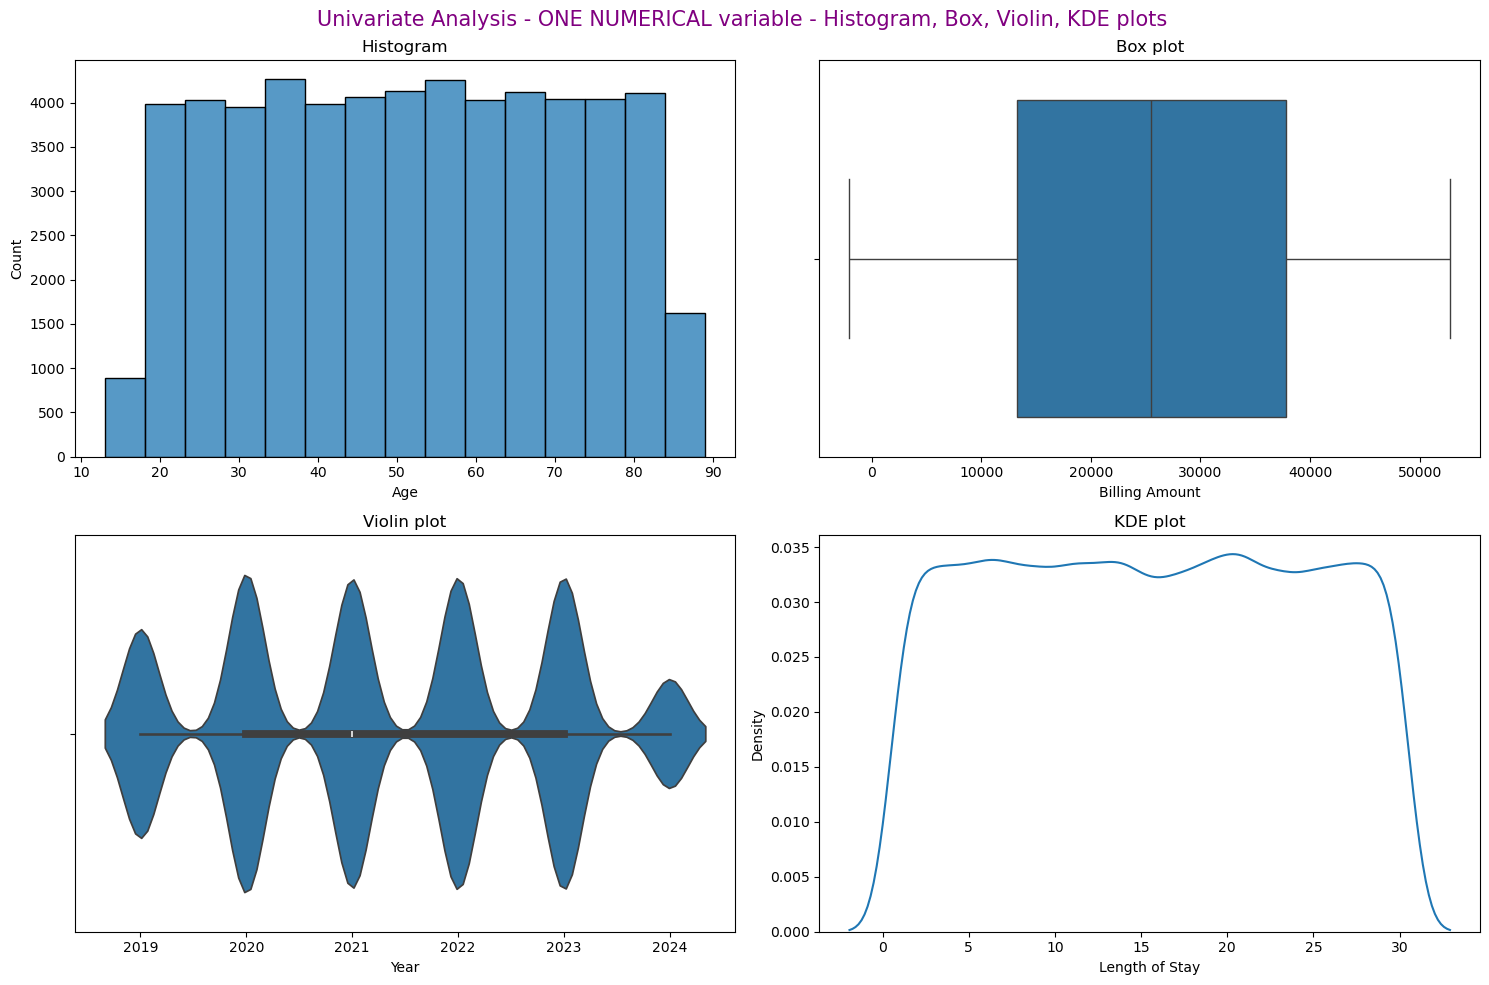

In [25]:
# PLots with ONE NUMERICAL variable - Histogram, Box, Violin, KDE plots 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
plt.suptitle("Univariate Analysis - ONE NUMERICAL variable - Histogram, Box, Violin, KDE plots ", color = "purple",fontsize=15)

sns.histplot(data=df, x ="Age", bins = 15, ax = axs[0,0])
axs[0,0].set_title("Histogram")

sns.boxplot(data=df, x ="Billing Amount", ax = axs[0,1])
axs[0,1].set_title("Box plot")

sns.violinplot(data=df, x ="Year", ax = axs[1,0])
axs[1,0].set_title("Violin plot")

sns.kdeplot(data=df, x ="Length of Stay",ax = axs[1,1])
axs[1,1].set_title("KDE plot")

plt.tight_layout() 
plt.show();

#### One Categorical

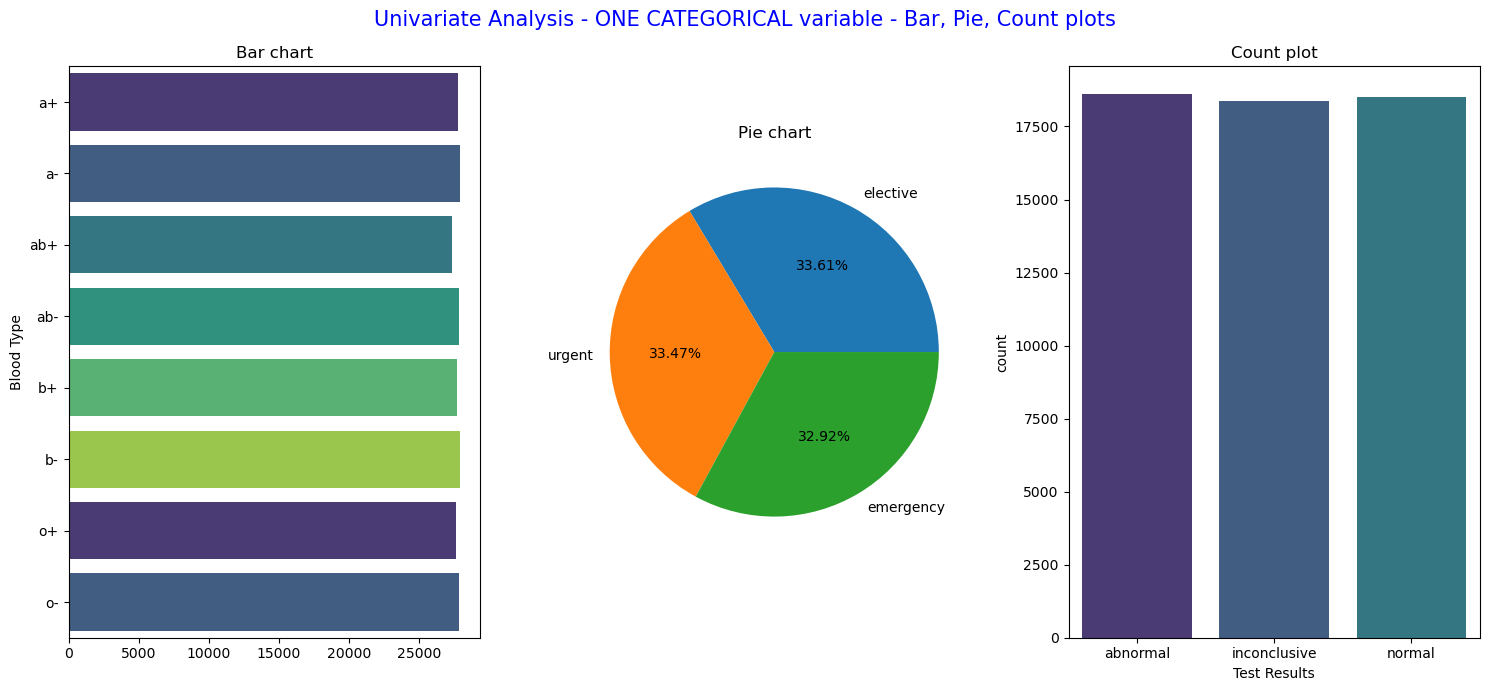

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15,7))
plt.suptitle("Univariate Analysis - ONE CATEGORICAL variable - Bar, Pie, Count plots", color = "b",fontsize=15)

sns.barplot(df["Blood Type"],ax = axs[0], ci = False, palette=sns.color_palette("viridis"))
axs[0].set_title("Bar chart")

axs[1].pie(x =df["Admission Type"].value_counts().values,
        labels=df["Admission Type"].value_counts().index, autopct = "%.2f%%")
axs[1].set_title("Pie chart")

sns.countplot(data=df, x ="Test Results", ax = axs[2], palette=sns.color_palette("viridis"))
axs[2].set_title("Count plot")

plt.tight_layout() 
plt.show();

### Bivariate Analysis

#### i)Categorical vs Categorical

In [27]:
df.select_dtypes(include='category').columns

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Admission Type', 'Medication',
       'Test Results', 'Age Group'],
      dtype='object')

In [28]:
pd.crosstab(df['Medical Condition'],df['Admission Type'])

Admission Type,elective,emergency,urgent
Medical Condition,,,
arthritis,3083,3108,3117
asthma,3102,3002,3081
cancer,3148,3015,3064
diabetes,3058,3017,3229
hypertension,3221,3001,3023
obesity,3043,3126,3062


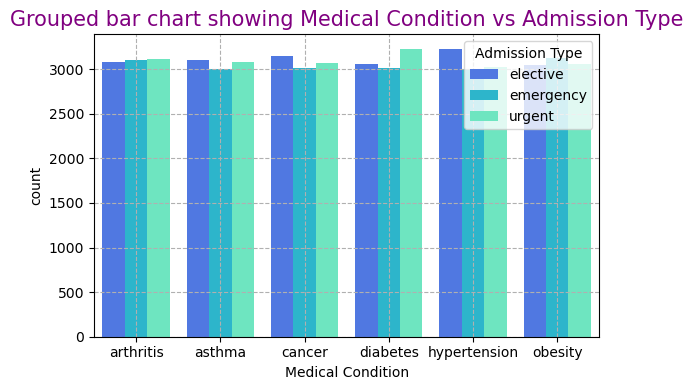

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Medical Condition',hue='Admission Type',palette=sns.color_palette('rainbow'))
plt.title("Grouped bar chart showing Medical Condition vs Admission Type",color='purple',fontsize=15)
plt.grid(ls="--")
plt.tight_layout()
plt.show();

##### Observation:
- Elective admissions are slightly higher for Hypertension and Cancer.
- Emergency cases are evenly spread across all conditions, with no major difference.
- Urgent admissions are a bit higher for Diabetes compared to other conditions.

In [30]:
pd.crosstab(df['Age Group'],df['Insurance Provider'])

Insurance Provider,aetna,blue cross,cigna,medicare,unitedhealthcare
Age Group,,,,,
children & teens,180,159,173,184,192
middle age,2401,2416,2513,2480,2491
older adults,2474,2441,2449,2557,2496
seniors,3204,3308,3297,3203,3238
young adults,2654,2735,2817,2730,2708


<Figure size 1000x700 with 0 Axes>

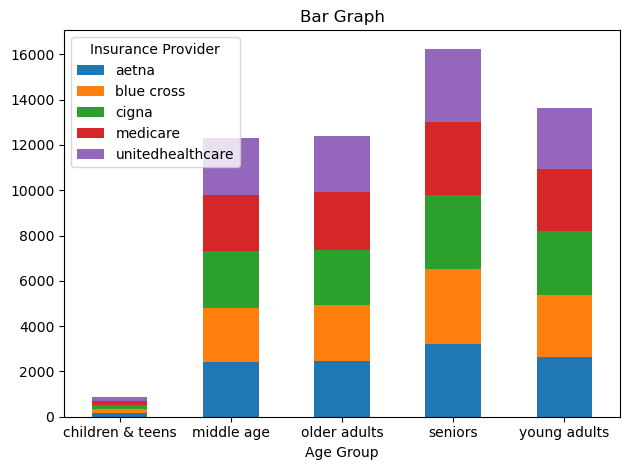

In [31]:
plt.figure(figsize=(10,7))
pd.crosstab(df['Age Group'],df['Insurance Provider']).plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title("Bar Graph")
plt.tight_layout()
plt.show();

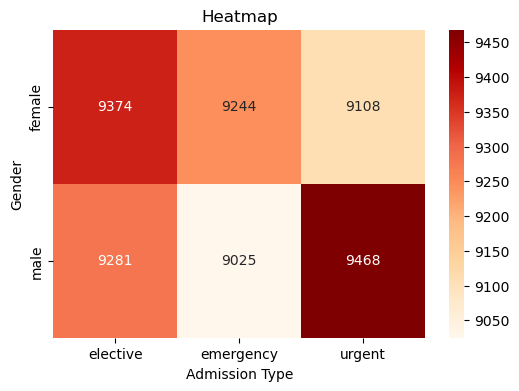

In [32]:
ct2 = pd.crosstab(df['Gender'], df['Admission Type'])
plt.figure(figsize=(6,4))
sns.heatmap(ct2, annot=True, fmt="d", cmap="OrRd")
plt.title("Heatmap")
plt.show();

##### Observation:

Both males and females are admitted under all types, but males show slightly higher emergency admissions.

#### ii) Categorical vs Numerical

In [33]:
df.groupby('Admission Type')[['Length of Stay']].mean()

,Length of Stay
Admission Type,
elective,15.525328
emergency,15.595052
urgent,15.408000


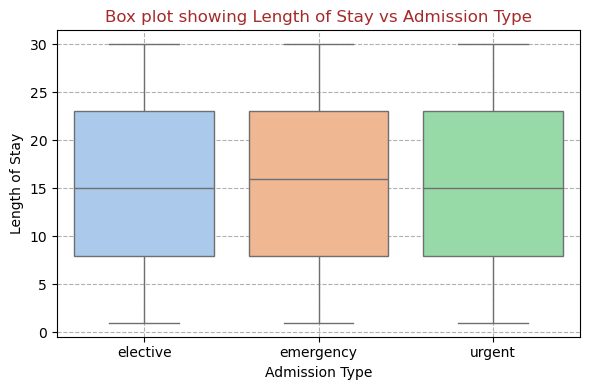

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Admission Type', y='Length of Stay', palette="pastel")
plt.title("Box plot showing Length of Stay vs Admission Type",color='brown')
plt.grid(ls="--")
plt.tight_layout()
plt.show();

##### Observation:
- Emergency admissions generally have a higher Length of Stay compared to elective or urgent cases.
- Elective admissions show the lowest and more consistent stay duration.
- Urgent cases fall in between but with some variability.

Emergency → Longer stays, Elective → Shorter stays, Urgent → Moderate stays.

#### KDE plot showing the analysis of categorical vs numerical

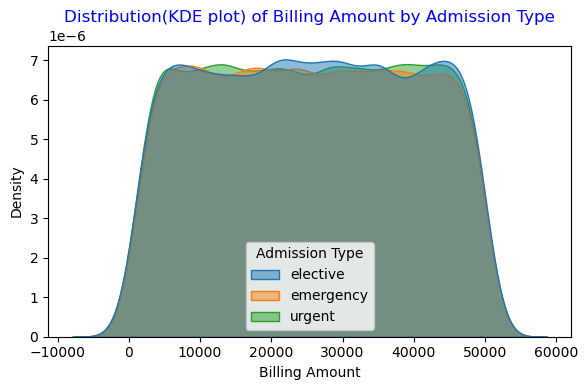

In [35]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Billing Amount', hue='Admission Type', fill=True, alpha=0.5)
plt.title("Distribution(KDE plot) of Billing Amount by Admission Type",color='blue')
plt.tight_layout()
plt.show();

##### Observation:
- The Billing Amount distribution differs by Admission Type.
- Emergency admissions tend to have a wider spread with some higher billing amounts.
- Elective admissions are more concentrated in a mid-range billing amount.
- Urgent admissions show overlap but lean slightly higher than elective.

#### iii) Numerical vs Numerical

In [36]:
df.select_dtypes(include=[int,float]).columns

Index(['Age', 'Billing Amount', 'Room Number', 'Year', 'Length of Stay'], dtype='object')

In [37]:
df[['Age','Length of Stay']].corr()

,Age,Length of Stay
Age,1.00000,0.00822
Length of Stay,0.00822,1.00000


#### Regression plot showing the analysis of both numerical columns

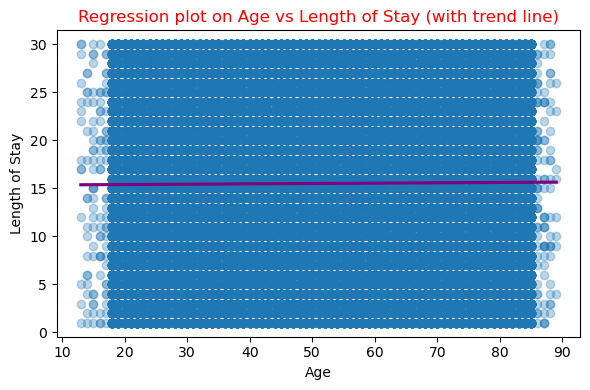

In [38]:
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='Age', y='Length of Stay', scatter_kws={'alpha':0.3}, line_kws={"color":"purple"})
plt.title("Regression plot on Age vs Length of Stay (with trend line)",color='red')
plt.tight_layout()
plt.show();

##### Observation:
- The regression line is almost flat, showing no strong linear relationship between Age and Length of Stay.
- Patients across all age groups tend to have similar hospitalization durations.
- A few scattered points suggest variability, but overall age does not significantly influence length of stay.

In [39]:
df[['Length of Stay','Billing Amount']].corr()

,Length of Stay,Billing Amount
Length of Stay,1.000000,-0.005602
Billing Amount,-0.005602,1.000000


#### Scatter plot showing the analysis of both numerical columns

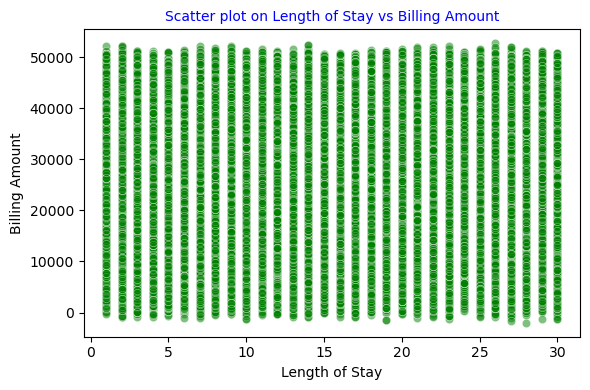

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Length of Stay', y='Billing Amount', alpha=0.5, color="green")
plt.title("Scatter plot on Length of Stay vs Billing Amount",color='blue',fontsize=10)
plt.tight_layout()
plt.show();

##### Observation:
- The plot shows a positive relationship between Length of Stay and Billing Amount – patients who stay longer generally incur higher costs.
- A few scattered points indicate outliers with unusually high billing amounts for shorter stays.

In [41]:
df[['Year','Room Number']].corr()

,Year,Room Number
Year,1.000000,0.006028
Room Number,0.006028,1.000000


<Figure size 600x500 with 0 Axes>

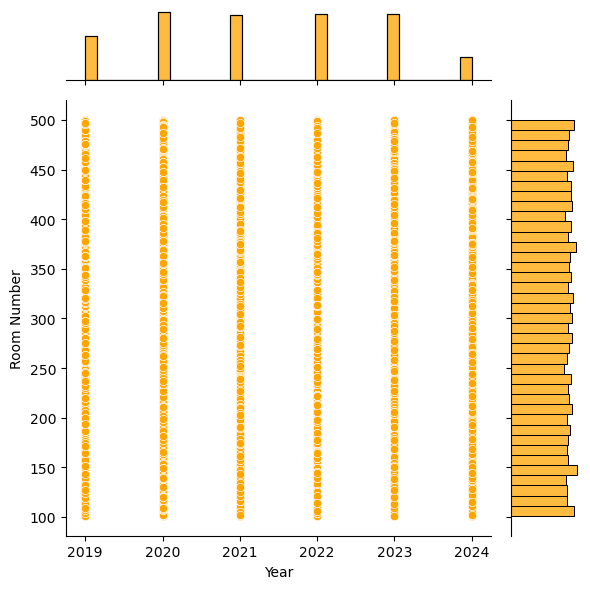

In [42]:
plt.figure(figsize=(6,5))
sns.jointplot(data=df,x='Year',y='Room Number',color='orange')
plt.tight_layout()
plt.savefig("D:Dataset/joint.png")
plt.show();

### Multivariate Analysis

#### Box plot showing the analysis of 2 categorical & 1 numerical

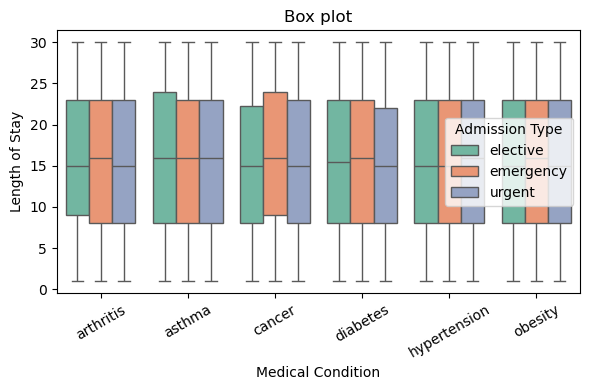

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Medical Condition', y='Length of Stay', hue='Admission Type', palette="Set2")
plt.title("Box plot")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show();

##### Observation:
- Emergency cases generally have longer stays across most conditions.
- Elective cases show lower variability in stay duration.

#### Bar plot showing the analysis of 2 categorical & 1 numerical

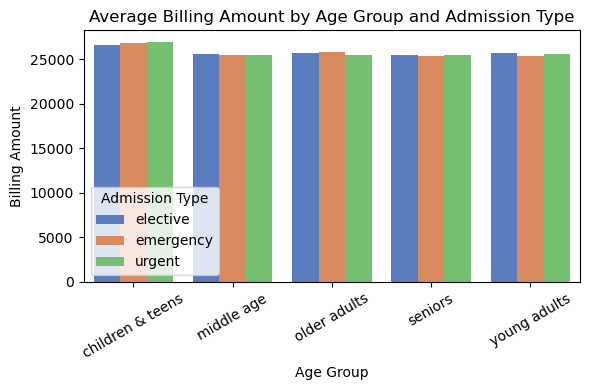

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Age Group', y='Billing Amount', hue='Admission Type', palette="muted", ci=False)
plt.title("Average Billing Amount by Age Group and Admission Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show();

##### Observation:
- Billing amount increases for emergencies across all age groups.
- Elderly groups (51–65, 66–90) often have higher costs, especially in emergency admissions.

#### Heatmap showing the analysis of 3 numericals

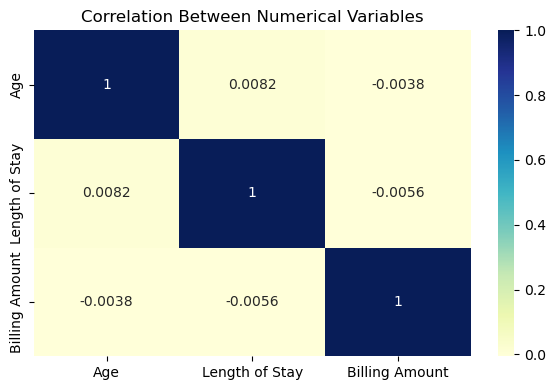

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age','Length of Stay','Billing Amount']].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Numerical Variables")
plt.tight_layout()
plt.show();

##### Observation:
- Length of Stay and Billing Amount show strong positive correlation.
- Age has weak correlation with both stay and billing.

#### Pairplot showing the analysis of 3 numerical & 1 categorical

<Figure size 600x400 with 0 Axes>

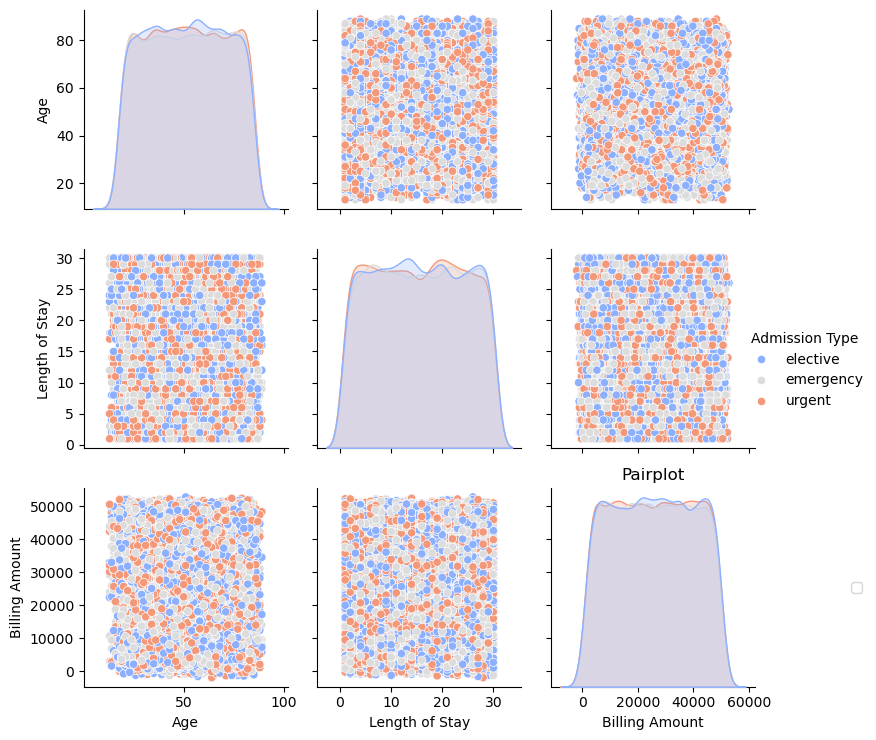

In [50]:
plt.figure(figsize=(6,4))
sns.pairplot(df, vars=['Age','Length of Stay','Billing Amount'], hue='Admission Type', palette="coolwarm")
plt.title("Pairplot")
plt.legend(loc="center", bbox_to_anchor=(1.5, 0.5))
plt.tight_layout()
plt.savefig("D:Dataset/pairplot.png")
plt.show();

##### Observation:
- Emergency admissions cluster in higher billing and longer stays.
- Electives are more compact (short stay + moderate billing).

In [47]:
# multivariate analysis using subplots 

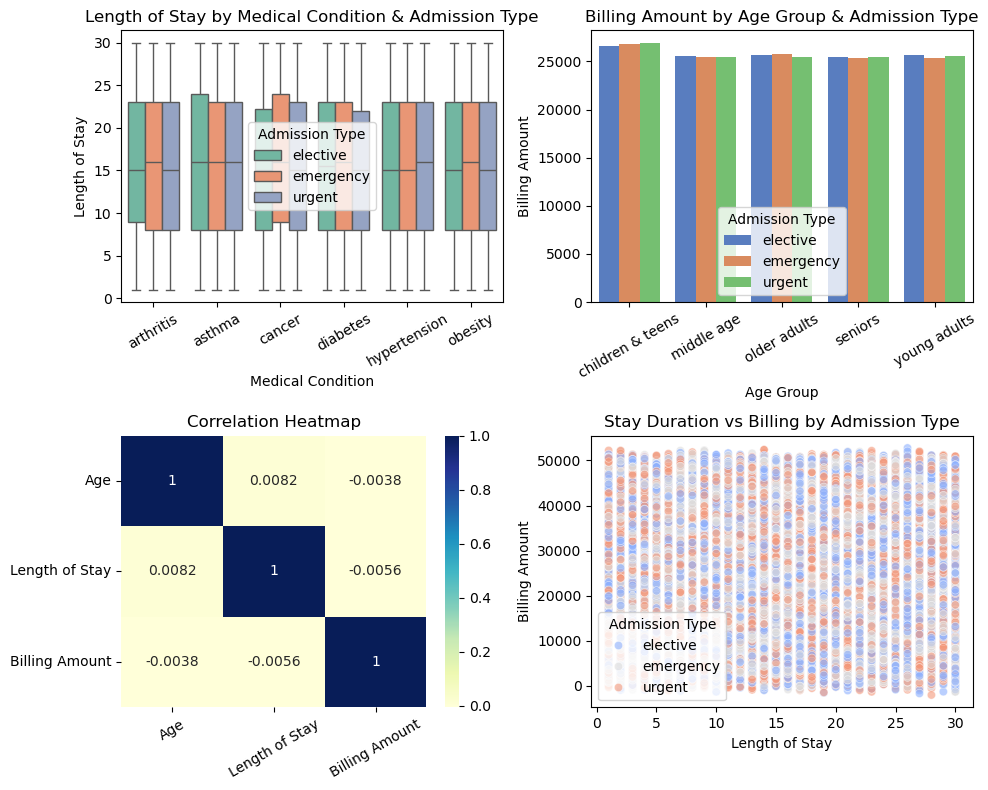

In [48]:
plt.figure(figsize=(10,8))

# 1. Boxplot: Medical Condition × Admission Type × Length of Stay
plt.subplot(2,2,1)
sns.boxplot(data=df, x='Medical Condition', y='Length of Stay', hue='Admission Type', palette="Set2")
plt.title("Length of Stay by Medical Condition & Admission Type")
plt.xticks(rotation=30)

# 2. Barplot: Age Group × Admission Type × Billing Amount
plt.subplot(2,2,2)
sns.barplot(data=df, x='Age Group', y='Billing Amount', hue='Admission Type', palette="muted", ci=False)
plt.xticks(rotation=30)
plt.title("Billing Amount by Age Group & Admission Type")

# 3. Heatmap: Correlation of numerical variables
plt.subplot(2,2,3)
sns.heatmap(df[['Age','Length of Stay','Billing Amount']].corr(), annot=True, cmap="YlGnBu", cbar=True)
plt.xticks(rotation=30)
plt.title("Correlation Heatmap")

# 4. Pairplot (placed separately since it’s big)
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='Length of Stay', y='Billing Amount', hue='Admission Type', alpha=0.6, palette="coolwarm")
plt.title("Stay Duration vs Billing by Admission Type")

plt.tight_layout()
plt.show(); 

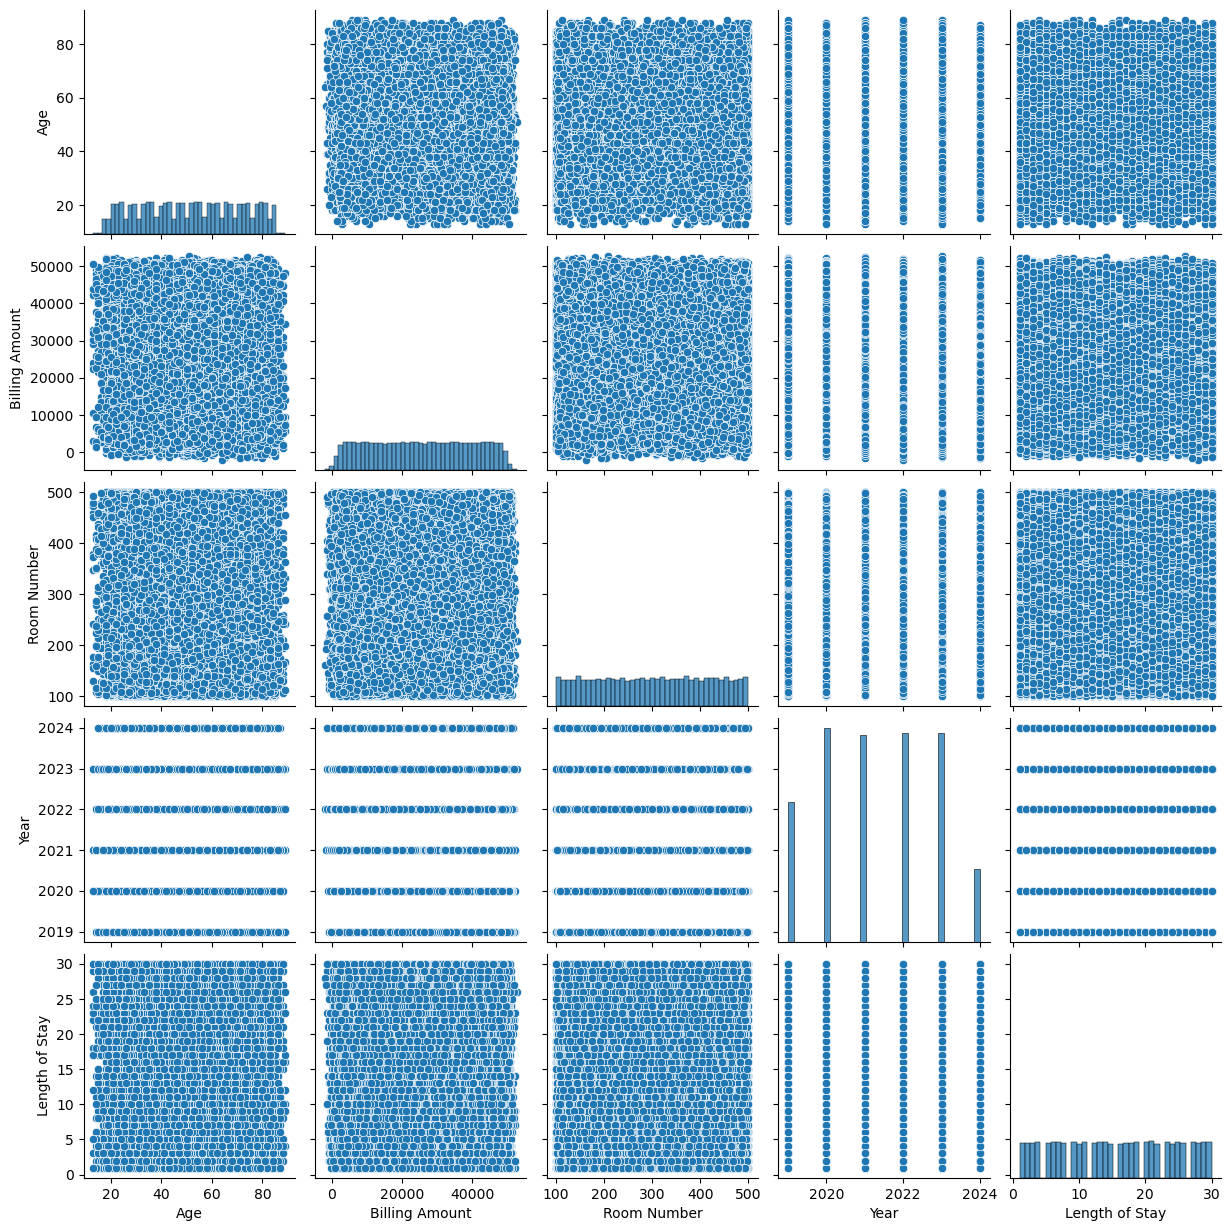

In [49]:
sns.pairplot(df);